# Time Series Forescasting

In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

In [21]:
def parser(x):
    return datetime.strptime(x,'%e-%m-%y')

data = pd.read_csv('godavari_daily.csv')


In [23]:

data['Date']=pd.to_datetime(data['Date'])
data.head()

,Date,Discharge,flood runoff,daily runoff,weekly runoff,Flood
0,1998-01-01,1449.0,0.0,0.41,NaN,0
1,1998-01-02,1449.0,0.0,0.41,NaN,0
2,1998-01-03,2017.0,0.0,0.56,NaN,0
3,1998-01-04,2017.0,0.0,0.56,NaN,0
4,1998-01-05,1533.0,0.0,0.43,NaN,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 6 columns):
Date             7670 non-null datetime64[ns]
Discharge        7289 non-null float64
flood runoff     7670 non-null float64
daily runoff     7670 non-null float64
weekly runoff    7664 non-null float64
Flood            7670 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 359.6 KB


In [25]:

for i in range(1,len(data.columns)):
    data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mean())

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 6 columns):
Date             7670 non-null datetime64[ns]
Discharge        7670 non-null float64
flood runoff     7670 non-null float64
daily runoff     7670 non-null float64
weekly runoff    7670 non-null float64
Flood            7670 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 359.6 KB


In [37]:
discharge=pd.DataFrame()
flood_runoff=pd.DataFrame()
daily_runoff=pd.DataFrame()
weekly_runoff=pd.DataFrame()

discharge['Date']=data["Date"]
discharge['Discharge']=data["Discharge"]
discharge=discharge.set_index(['Date'])

flood_runoff["Date"]=data["Date"]
flood_runoff["flood runoff"]=data["flood runoff"]
flood_runoff=flood_runoff.set_index(['Date'])

daily_runoff['Date']=data['Date']
daily_runoff['daily runoff']=data['daily runoff']
daily_runoff=daily_runoff.set_index(['Date'])

weekly_runoff['Date']=data['Date']
weekly_runoff['weekly runoff']=data['weekly runoff']
weekly_runoff=weekly_runoff.set_index(['Date'])

In [38]:
discharge.head()

,Discharge
Date,
1998-01-01,1449.0
1998-01-02,1449.0
1998-01-03,2017.0
1998-01-04,2017.0
1998-01-05,1533.0


In [39]:
discharge.columns

Index(['Discharge'], dtype='object')

In [30]:
#discharge.Date[1]

In [41]:
# discharge[['Date', 'Discharge']].groupby("Date").sum().plot(figsize=(13,8));

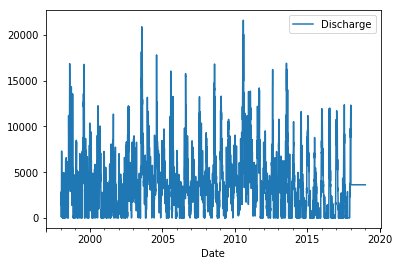

In [43]:
discharge.plot()

In [44]:
rolmean=discharge.rolling(window=12).mean()
rolstd=discharge.rolling(window=12).std()
#print(rolmean,rolstd)

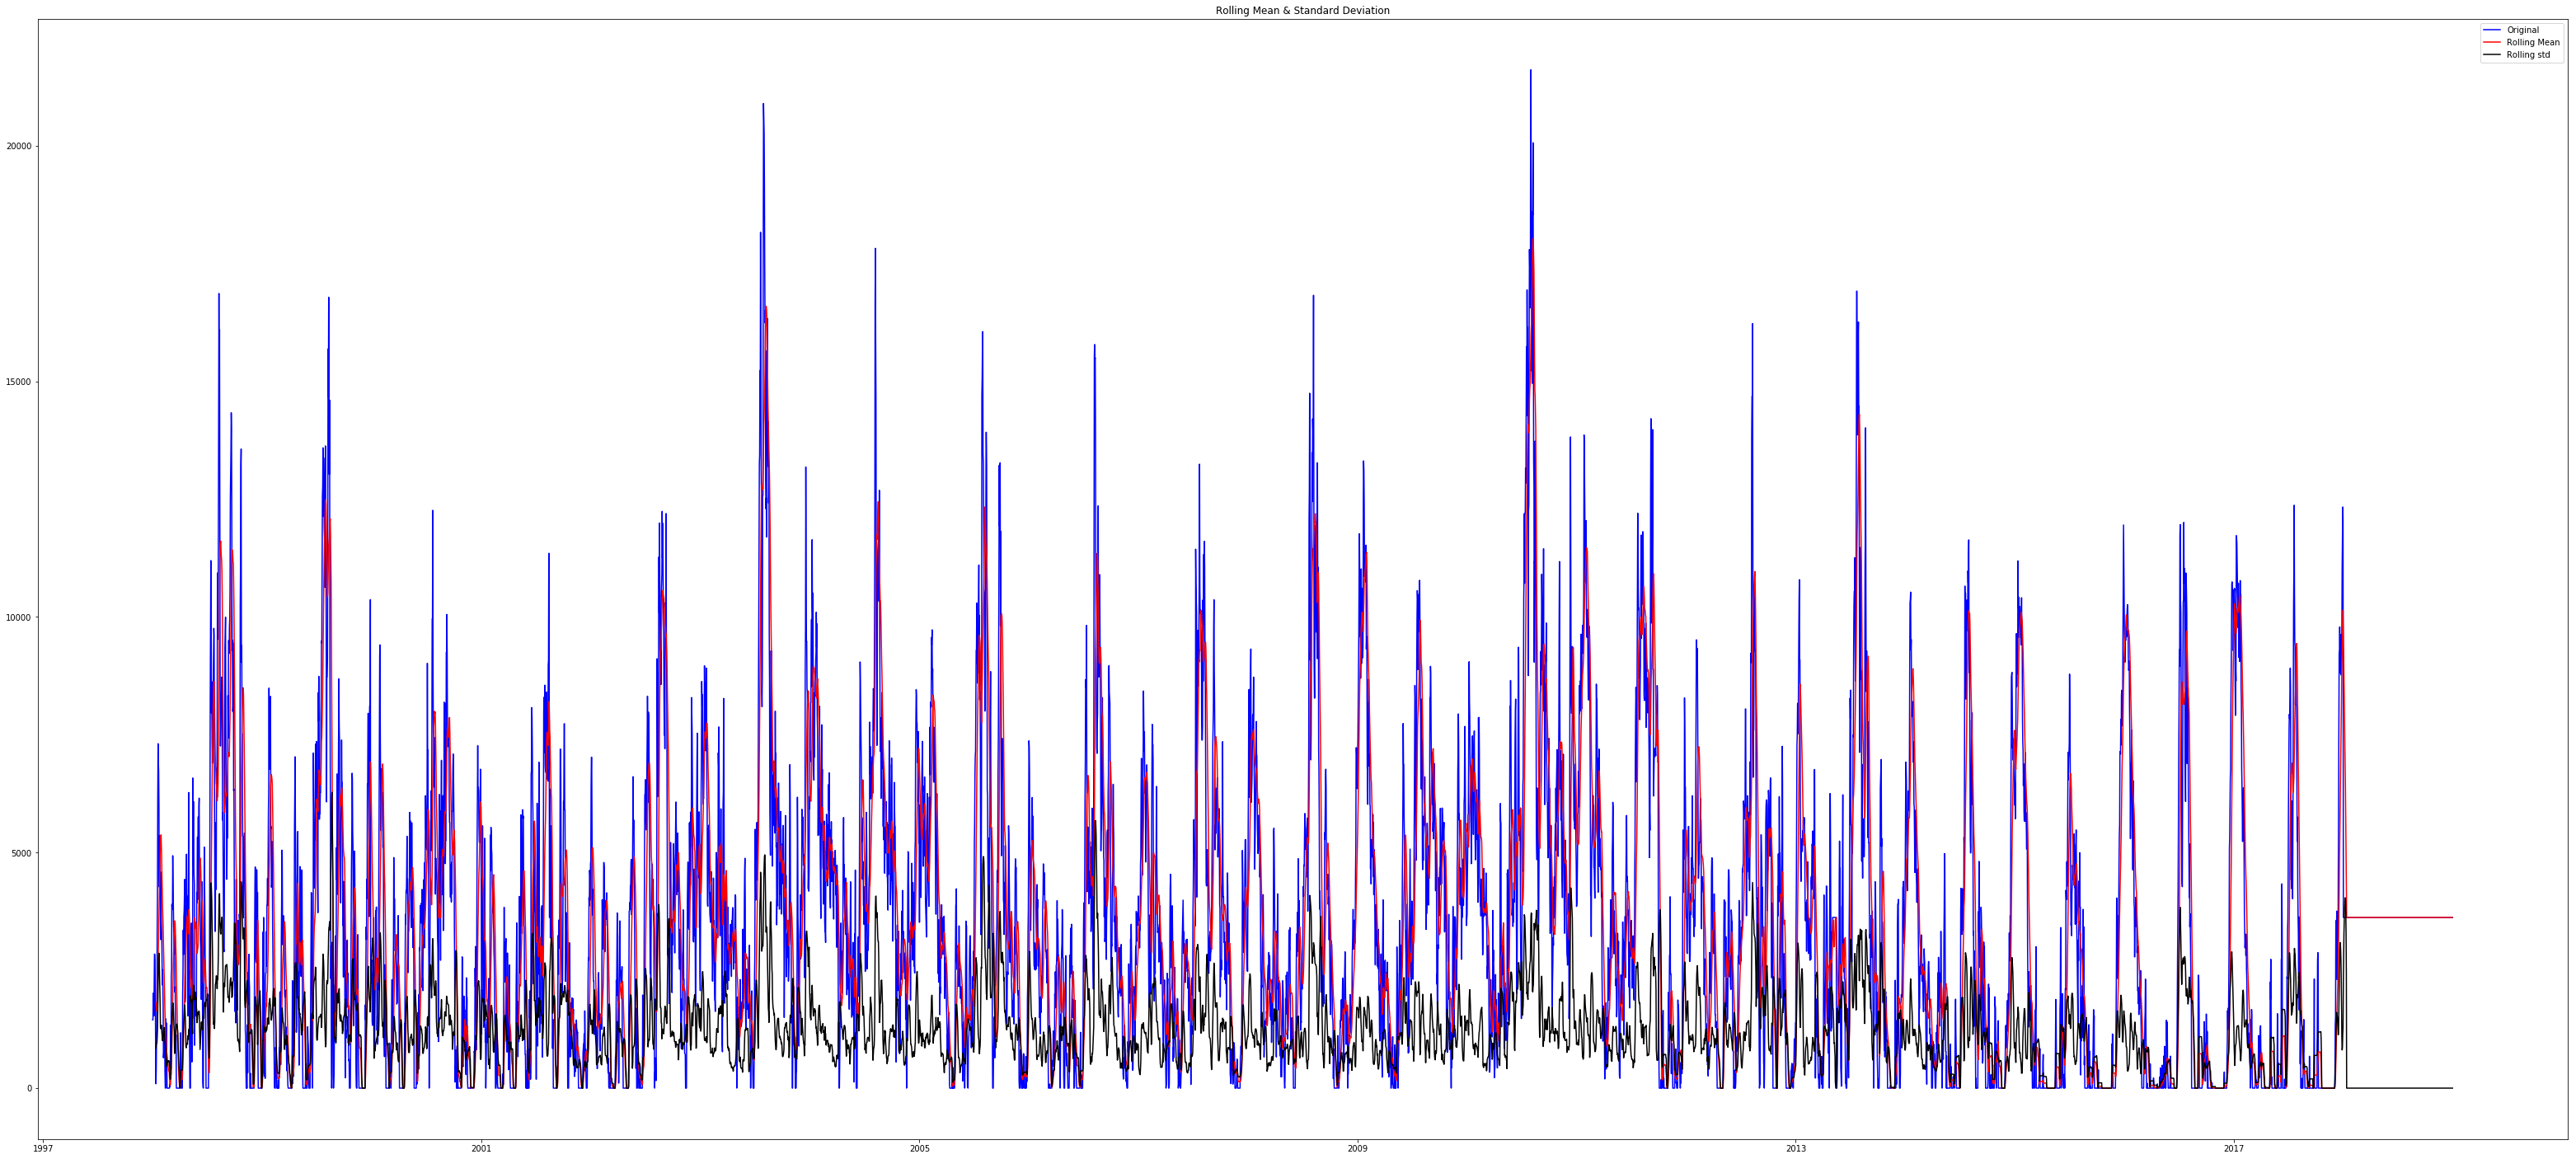

In [45]:
plt.figure(figsize=(55,25))
orig=plt.plot(discharge,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

plt.show(block=False)

Stationary means mean, variance and covariance is constant over periods.

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


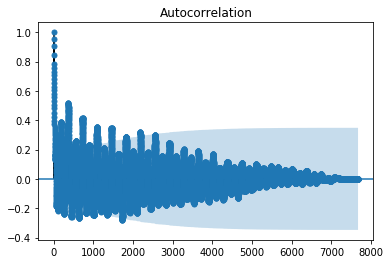

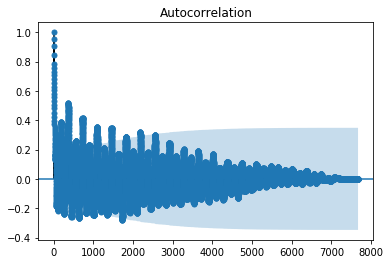

In [46]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(discharge)

### Converting series to stationary

In [47]:
x=discharge

In [48]:
x.head()

,Discharge
Date,
1998-01-01,1449.0
1998-01-02,1449.0
1998-01-03,2017.0
1998-01-04,2017.0
1998-01-05,1533.0


In [128]:
x.shift(12)
x.head()

,Discharge
Date,
1998-01-01,1449.0
1998-01-02,1449.0
1998-01-03,2017.0
1998-01-04,2017.0
1998-01-05,1533.0


In [129]:
discharge_diff = discharge.diff(periods=30)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model


In [130]:
discharge_diff.head()

,Discharge
Date,
1998-01-01,NaN
1998-01-02,NaN
1998-01-03,NaN
1998-01-04,NaN
1998-01-05,NaN


In [131]:
#data_diff = data_diff[1:]
discharge_diff['Discharge'] = discharge_diff['Discharge'].fillna(discharge_diff['Discharge'].mean())


In [50]:
#discharge_diff.head()
discharge_diff=discharge

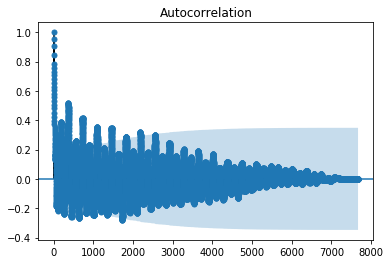

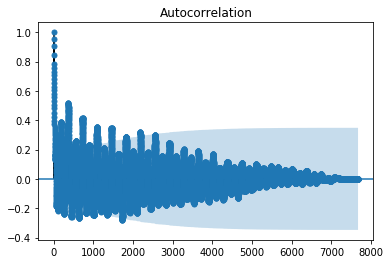

In [52]:
plot_acf(discharge_diff)

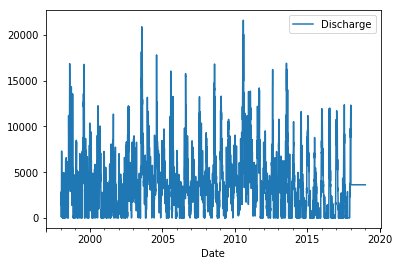

In [53]:
discharge_diff.plot()

In [77]:
X = discharge_diff.values
train = X[0:7640] # 27 data as train data
test = X[7640:]  # 9 data as test data
predictions = []

In [78]:
train.size, test.size

(7640, 30)

# Autoreggresive AR Model

In [79]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [80]:
predictions = model_ar_fit.predict(start=7640,end=(7640+30))

In [81]:
test

array([[3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668],
       [3623.03388668]])

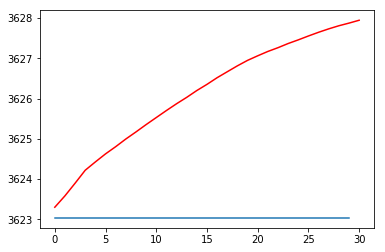

In [82]:
plt.plot(test)
plt.plot(predictions,color='red')

# ARIMA model

In [83]:
from statsmodels.tsa.arima_model import ARIMA

In [84]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(4, 1, 4))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

125872.85548625534


In [85]:
predictions= model_arima_fit.forecast(steps=30)[0]
predictions

array([3623.39245593, 3623.77346922, 3624.20755356, 3624.65911523,
       3624.95923015, 3625.25907162, 3625.53559629, 3625.82682115,
       3626.1092355 , 3626.39614012, 3626.67950092, 3626.96489406,
       3627.24901048, 3627.53393035, 3627.818339  , 3628.10306254,
       3628.38758717, 3628.67223644, 3628.9568076 , 3629.24142767,
       3629.52601704, 3629.81062564, 3630.09522218, 3630.37982628,
       3630.66442565, 3630.94902798, 3631.23362845, 3631.51823009,
       3631.802831  , 3632.08743236])

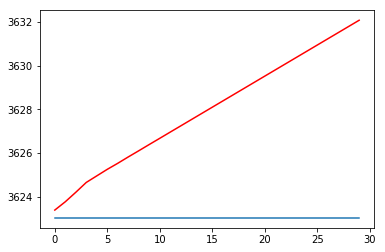

In [86]:
plt.plot(test)
plt.plot(predictions,color='red')

In [87]:
mean_squared_error(test,predictions)

30.28144248607429

In [88]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [89]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 145473.29804584463
(0, 0, 1) 137222.68188977975
(0, 0, 3) 129899.11392130473
(0, 0, 4) 128760.8565386759
(0, 1, 0) 127334.68505568194
(0, 1, 1) 127326.24525438575
(0, 1, 2) 127058.23094889827
(0, 1, 3) 127053.65932353953
(0, 1, 4) 125951.17517195694
(0, 2, 0) 132295.05327167778
(0, 2, 1) 127329.95568218047
(0, 2, 2) 127321.4514258343
(0, 2, 3) 127052.96534933931
(1, 0, 0) 127174.6792456839
(1, 0, 1) 127151.10058235966
(1, 0, 2) 126769.66014126455
(1, 0, 3) 126660.24528915806
(1, 0, 4) 125847.83521172924
(1, 1, 0) 127323.95560221834
(1, 1, 1) 127311.80865257018
(1, 1, 2) 127058.99669417739
(1, 1, 3) 126488.48727368325
(1, 1, 4) 125948.61784619535
(1, 2, 0) 129709.58588799111
(1, 2, 1) 127319.16766227629
(1, 2, 2) 127102.3714440922
(1, 2, 3) 127099.3519218265
(2, 0, 0) 127143.67838137559
(2, 0, 1) 127109.06394364436
(2, 0, 2) 126748.28314524249
(2, 0, 3) 126100.09182364536
(2, 0, 4) 125835.27047657158
(2, 1, 0) 127235.47467813402
(2, 1, 1) 127236.68705919635
(2, 1, 2) 126509.75